<a href="https://colab.research.google.com/github/EdWangLoDaSc/Dropout-as-a-Grid-Search_Representing-Model-Uncertainty-in-Deep-Learning/blob/main/cGAN_hybrid_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
from google.colab import drive
drive.mount('./content')

Mounted at ./content


In [138]:
from __future__ import print_function, division

import numpy as np
from keras.layers import Input
from keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
#from network import build_discriminator, build_generator


import keras
from keras import Input, Model
from keras.layers import Dense, LeakyReLU, concatenate


def build_generator(network):
    seed = network.seed
    random_normal = keras.initializers.RandomNormal(seed=seed)

    if network.activation == "linear":
        activation = "linear"
        kerner_initializer = keras.initializers.RandomUniform(seed=seed)
    elif network.activation == "elu":
        activation = "elu"
        kerner_initializer = keras.initializers.he_normal(seed=seed)
    elif network.activation == "selu":
        activation = "selu"
        kerner_initializer = keras.initializers.he_normal(seed=seed)
    elif network.activation == "relu":
        activation = "relu"
        kerner_initializer = keras.initializers.he_uniform(seed=seed)
    elif network.activation == "lrelu":
        activation = LeakyReLU()
        kerner_initializer = keras.initializers.he_normal(seed=seed)
    elif network.activation == "tanh":
        activation = "tanh"
        kerner_initializer = keras.initializers.RandomUniform(seed=seed)
    elif network.activation == "sigmoid":
        activation = "sigmoid"
        kerner_initializer = keras.initializers.RandomUniform(seed=seed)
    else:
        raise NotImplementedError("Activation not recognized")

   

    if network.architecture == 3:
        x = Input(shape=(network.x_input_size,), dtype='float')
        x_output = Dense(100, activation=activation, kernel_initializer=kerner_initializer)(x)

        noise = Input(shape=(network.z_input_size,))
        noise_output = Dense(100, activation=activation, kernel_initializer=kerner_initializer)(noise)

        concat = concatenate([x_output, noise_output])

        output = Dense(64, activation=activation, kernel_initializer=kerner_initializer)(concat)
        output = Dense(64, activation=activation, kernel_initializer=kerner_initializer)(output)
        output = Dense(64, activation=activation, kernel_initializer=kerner_initializer)(output)
        output = Dense(64, activation=activation, kernel_initializer=kerner_initializer)(output)
        output = Dense(network.y_input_size, activation="linear", kernel_initializer=random_normal)(output)

        model = Model(inputs=[noise, x], outputs=output)

    elif network.architecture == 4:
        x = Input(shape=(network.x_input_size,), dtype='float')
        x_output = Dense(100, activation=activation, kernel_initializer=kerner_initializer)(x)

        noise = Input(shape=(network.z_input_size,))
        noise_output = Dense(100, activation=activation, kernel_initializer=kerner_initializer)(noise)

        concat = concatenate([x_output, noise_output])

        output = Dense(100, activation=activation, kernel_initializer=kerner_initializer)(concat)
        output = Dense(75, activation=activation, kernel_initializer=kerner_initializer)(output)
        output = Dense(75, activation=activation, kernel_initializer=kerner_initializer)(output)
        output = Dense(75, activation=activation, kernel_initializer=kerner_initializer)(output)
        output = Dense(75, activation=activation, kernel_initializer=kerner_initializer)(output)
        output = Dense(50, activation=activation, kernel_initializer=kerner_initializer)(output)
        output = Dense(network.y_input_size, activation="linear", kernel_initializer=random_normal)(output)

        model = Model(inputs=[noise, x], outputs=output)

    elif network.architecture == 5:
        x = Input(shape=(network.x_input_size,), dtype='float')
        x_output = Dense(150, activation=activation, kernel_initializer=kerner_initializer)(x)

        noise = Input(shape=(network.z_input_size,))
        noise_output = Dense(150, activation=activation, kernel_initializer=kerner_initializer)(noise)

        concat = concatenate([x_output, noise_output])

        output = Dense(150, activation=activation, kernel_initializer=kerner_initializer)(concat)
        output = Dense(75, activation=activation, kernel_initializer=kerner_initializer)(output)
        output = Dense(75, activation=activation, kernel_initializer=kerner_initializer)(output)
        output = Dense(75, activation=activation, kernel_initializer=kerner_initializer)(output)
        output = Dense(75, activation=activation, kernel_initializer=kerner_initializer)(output)
        output = Dense(75, activation=activation, kernel_initializer=kerner_initializer)(output)
        output = Dense(network.y_input_size, activation="linear", kernel_initializer=random_normal)(output)

        model = Model(inputs=[noise, x], outputs=output)

    else:
        raise NotImplementedError("Architecture does not exist")

    return model


def build_discriminator(network):
    seed = network.seed
    random_uniform = keras.initializers.RandomUniform(seed=seed)

    if network.activation == "linear":
        activation = "linear"
        kerner_initializer = keras.initializers.RandomUniform(seed=seed)
    elif network.activation == "elu":
        activation = "elu"
        kerner_initializer = keras.initializers.he_normal(seed=seed)
    elif network.activation == "selu":
        activation = "selu"
        kerner_initializer = keras.initializers.he_normal(seed=seed)
    elif network.activation == "relu":
        activation = "relu"
        kerner_initializer = keras.initializers.he_uniform(seed=seed)
    elif network.activation == "lrelu":
        activation = LeakyReLU()
        kerner_initializer = keras.initializers.he_normal(seed=seed)
    elif network.activation == "tanh":
        activation = "tanh"
        kerner_initializer = keras.initializers.RandomUniform(seed=seed)
    elif network.activation == "sigmoid":
        activation = "sigmoid"
        kerner_initializer = keras.initializers.RandomUniform(seed=seed)
    else:
        raise NotImplementedError("Activation not recognized")


    # CA-housing and ailerons
    if network.architecture == 3:
        x = Input(shape=(network.x_input_size,), dtype='float')
        x_output = Dense(100, activation=activation, kernel_initializer=kerner_initializer)(x)

        label = Input(shape=(network.y_input_size,))
        label_output = Dense(100, activation=activation, kernel_initializer=kerner_initializer)(label)

        concat = concatenate([x_output, label_output])
        concat = Dense(50, activation=activation, kernel_initializer=kerner_initializer)(concat)
        concat = Dense(50, activation=activation, kernel_initializer=kerner_initializer)(concat)
        concat = Dense(50, activation=activation, kernel_initializer=kerner_initializer)(concat)
        concat = Dense(50, activation=activation, kernel_initializer=kerner_initializer)(concat)

        concat = Dense(50, activation=activation, kernel_initializer=kerner_initializer)(concat)

        validity = Dense(1, activation="sigmoid", kernel_initializer=random_uniform)(concat)

        model = Model(inputs=[x, label], outputs=validity)

    elif network.architecture == 4:
        x = Input(shape=(network.x_input_size,), dtype='float')
        x_output = Dense(100, activation=activation, kernel_initializer=kerner_initializer)(x)

        label = Input(shape=(network.y_input_size,))
        label_output = Dense(100, activation=activation, kernel_initializer=kerner_initializer)(label)

        concat = concatenate([x_output, label_output])
        concat = Dense(50, activation=activation, kernel_initializer=kerner_initializer)(concat)
        concat = Dense(50, activation=activation, kernel_initializer=kerner_initializer)(concat)
        concat = Dense(50, activation=activation, kernel_initializer=kerner_initializer)(concat)
        concat = Dense(50, activation=activation, kernel_initializer=kerner_initializer)(concat)
        concat = Dense(25, activation=activation, kernel_initializer=kerner_initializer)(concat)
        validity = Dense(1, activation="sigmoid", kernel_initializer=random_uniform)(concat)

        model = Model(inputs=[x, label], outputs=validity)

    elif network.architecture == 5:
        x = Input(shape=(network.x_input_size,), dtype='float')
        x_output = Dense(100, activation=activation, kernel_initializer=kerner_initializer)(x)

        label = Input(shape=(network.y_input_size,))
        label_output = Dense(100, activation=activation, kernel_initializer=kerner_initializer)(label)

        concat = concatenate([x_output, label_output])
        concat = Dense(100, activation=activation, kernel_initializer=kerner_initializer)(concat)
        concat = Dense(75, activation=activation, kernel_initializer=kerner_initializer)(concat)
        concat = Dense(75, activation=activation, kernel_initializer=kerner_initializer)(concat)
        concat = Dense(50, activation=activation, kernel_initializer=kerner_initializer)(concat)
        concat = Dense(50, activation=activation, kernel_initializer=kerner_initializer)(concat)
        validity = Dense(1, activation="sigmoid", kernel_initializer=random_uniform)(concat)

        model = Model(inputs=[x, label], outputs=validity)

    else:
        raise NotImplementedError("Architecture does not exist")

    return model


class CGAN():
    def __init__(self, exp_config):
        if exp_config.model.optim_gen == "Adam":
            self.optimizer_gen = Adam(exp_config.model.lr_gen, decay=exp_config.model.dec_gen)
        else:
            self.optimizer_gen = SGD(exp_config.model.lr_gen, decay=exp_config.model.dec_gen)
        if exp_config.model.optim_disc == "Adam":
            self.optimizer_disc = Adam(exp_config.model.lr_disc, decay=exp_config.model.dec_disc)
        else:
            self.optimizer_disc = SGD(exp_config.model.lr_disc, decay=exp_config.model.dec_disc)
        self.activation = exp_config.model.activation
        self.seed = exp_config.model.random_seed
        #self.scenario = exp_config.dataset.scenario
        self.x_input_size = 6
        self.y_input_size = 1
        self.z_input_size = exp_config.model.z_input_size
        self.architecture = 3
      
       
  

        if exp_config.model.architecture is not None:
            self.architecture = exp_config.model.architecture

        # Build and compile the discriminator
        self.discriminator = build_discriminator(self)
        self.discriminator.compile(
            loss=['binary_crossentropy'],
            optimizer=self.optimizer_disc,
            metrics=['accuracy'])

        # Build the generator
        self.generator = build_generator(self)

        # The generator takes noise and the target label as input
        # and generates the corresponding digit of that label
        noise = Input(shape=(self.z_input_size,))

        x = Input(shape=(self.x_input_size,))
        label = self.generator([noise, x])

        # For the combined model we will only train the generator
        self.discriminator.trainable = False

        # The discriminator takes generated image as input and determines validity
        # and the label of that image
        validity = self.discriminator([x, label])

        # The combined model (stacked generator and discriminator)
        # Trains generator to fool discriminator
        self.combined = Model([noise, x], validity)
        self.combined.compile(
            loss=['binary_crossentropy'],
            optimizer=self.optimizer_gen)

    def train(self, xtrain, ytrain, epochs, batch_size=128, verbose=True):
        # Adversarial ground truths
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))

        dLossErr = np.zeros([epochs, 1])
        dLossReal = np.zeros([epochs, 1])
        dLossFake = np.zeros([epochs, 1])
        gLossErr = np.zeros([epochs, 1])
        genPred = np.zeros([epochs, 1])
        genReal = np.zeros([epochs, 1])
        mape = np.zeros([epochs, 1])

        for epoch in range(epochs):
            for batch_idx in range(int(xtrain.shape[0] // batch_size)):
                # ---------------------
                #  Train Discriminator
                # ---------------------
                # Select a random half batch of images
                idx = np.random.randint(0, xtrain.shape[0], batch_size)
                x, true_labels = xtrain[idx], ytrain[idx]
                # Sample noise as generator input
                noise = np.random.normal(0, 1, (batch_size, self.z_input_size))
                # Generate a half batch of new images
                fake_labels = self.generator.predict([noise, x])
                # Train the discriminator
                d_loss_real = self.discriminator.train_on_batch([x, true_labels], valid)
                d_loss_fake = self.discriminator.train_on_batch([x, fake_labels], fake)
                d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

                # ---------------------
                #  Train Generator
                # ---------------------
                # Condition on x
                idx = np.random.randint(0, xtrain.shape[0], batch_size)
                sample = xtrain[idx]
                # Train the generator
                g_loss = self.combined.train_on_batch([noise, sample], valid)

            dLossErr[epoch] = d_loss[0]
            dLossReal[epoch] = d_loss_real[0]
            dLossFake[epoch] = d_loss_fake[0]
            gLossErr[epoch] = g_loss

            ypred = self.predict(xtrain)
            mape[epoch] = mean_absolute_percentage_error(ytrain, ypred)
            #genPred[epoch] = np.average(ypred)
            #genReal[epoch] = np.average(ytrain)

            if verbose:
                print(f"Epoch: {epoch} / dLoss: {d_loss[0]} / gLoss: {g_loss} / {mean_squared_error(ytrain,ypred,)}")

            ypred = self.predict(xtrain)
            #mape = mean_absolute_percentage_error(np.average(ytrain), np.average(ypred))
            genPred[epoch] = np.average(ypred)
            genReal[epoch] = np.average(ytrain)

        return dLossErr, dLossReal, dLossFake, gLossErr, genPred, genReal

    def predict(self, xtest):
        noise = np.random.normal(0, 1, (xtest.shape[0], self.z_input_size))
        ypred = self.generator.predict([noise, xtest])
       # rmse = np.mean((ypred-y_test))
        return ypred

    def sample(self, xtest, n_samples):
        y_samples_gan = self.predict(xtest)
        for i in range(n_samples - 1):
            ypred_gan = self.predict(xtest)
            y_samples_gan = np.hstack([y_samples_gan, ypred_gan])
        median = []
        mean = []
        for j in range(y_samples_gan.shape[0]):
            median.append(np.median(y_samples_gan[j, :]))
            mean.append(np.mean(y_samples_gan[j, :]))

        return np.array(mean).reshape(-1, 1), np.array(median).reshape(-1, 1), y_samples_gan

import typing


class RunConfig(typing.NamedTuple):
    save_fig: int = 0
    save_pdf: int = 0


class ModelConfig(typing.NamedTuple):
    architecture: int = None
    lr_gen: float = 0.001
    lr_disc: float = 0.001
    optim_gen: str = "Adam"
    optim_disc: str = "SGD"
    dec_gen: float = 0
    dec_disc: float = 0
    random_seed: int = 1985
    activation: str = "elu"
    z_input_size: int = 1


class TrainingConfig(typing.NamedTuple):
    n_epochs: int = 100
    batch_size: int = 128
    n_samples: int = 100


class Config(typing.NamedTuple):
    run: RunConfig
    model: ModelConfig
    training: TrainingConfig

In [140]:
import os

random_seed = 42
exp_config = Config(
        model=ModelConfig(activation="relu", lr_gen=0.0001, lr_disc=0.001, dec_gen=0, dec_disc=0, 
                                 optim_gen="Adam", optim_disc="Adam", z_input_size=1, random_seed=42),
        training=TrainingConfig(n_epochs=200, batch_size=256, n_samples=50),
        
        run=RunConfig(save_fig=1)
    )
    

In [104]:
from numpy import random
np.random.seed(exp_config.model.random_seed)
random.seed(exp_config.model.random_seed)

import tensorflow
tensorflow.random.set_seed(exp_config.model.random_seed)


In [146]:
import pandas as pd
dataset = pd.read_csv('/content/drive/MyDrive/Hybrid_datasets.csv')
dataset = dataset.drop(['diff'], axis = 1)
dataset = dataset.astype('float64')
dataset['NB2_S_x_NYZ_x_x_Fcw_x'] *= 0.28
dataset['NB2_S_1_NYZ_sys_x_PcwOut_x'] *= 100000
dataset['NB2_S_1_NYZ_sys_x_PcwIn_x'] *= 100000
X = dataset.drop(['NB2_S_x_NYZ_x_x_Fcw_x'], axis = 1).values
y = dataset['NB2_S_x_NYZ_x_x_Fcw_x'].values

In [147]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=10)


In [9]:
from sklearn.model_selection import train_test_split
def train_test_val_split(X, y, train_ratio = 0.2,validation_ratio = 0.1,test_ratio = 0.1,random_state=42):
    # random_state for reproduction
    
    [x_train, x_test,y_train, y_test] = train_test_split(
        X, y,test_size=validation_ratio+test_ratio, random_state=random_state, shuffle=True)
    [x_val, x_test,y_test,y_val ] = train_test_split(
        x_test, y_test,test_size=test_ratio/(test_ratio + validation_ratio), random_state=random_state)
    return x_train, x_test, x_val, y_train, y_test, y_val

In [10]:
a = train_test_val_split(X, y, train_ratio = 0.2,validation_ratio = 0.1,test_ratio = 0.1,random_state=42)
x_train = a[0]
x_test = a[1]
x_valid = a[2]

y_train = a[3]
y_test = a[4]
y_valid = a[5]

In [107]:
from sklearn.preprocessing import StandardScaler
y = y.reshape(-1,1)
standardscaler_x = StandardScaler()
X = standardscaler_x.fit_transform(X)
standardscaler_y = StandardScaler()
y = standardscaler_y.fit_transform(y)

y = y.reshape(len(y),)

In [18]:
y.shape

(78187,)

In [148]:
from sklearn.preprocessing import StandardScaler
y_train = y_train.reshape(-1,1)
y_val = y_val.reshape(-1,1)
scaler_x = StandardScaler()
scaler_y = StandardScaler()
x_train_scaled = scaler_x.fit_transform(X_train)
X_val_scaled = scaler_x.transform(X_val)
y_train_scaled = scaler_y.fit_transform(y_train)
y_val_scaled = scaler_y.transform(y_val)

In [169]:
y_val = pd.DataFrame(y_val)
y_val.to_csv('/content/drive/MyDrive/y_val.csv')

y_train = pd.DataFrame(y_train)
y_train.to_csv('/content/drive/MyDrive/y_train.csv')

y_test = pd.DataFrame(y_test)
y_test.to_csv('/content/drive/MyDrive/y_test.csv')

In [153]:
X_val_scaled

array([[-0.45685302, -0.82554907, -1.52656355,  1.31699774,  0.97378519,
         0.92080204],
       [-0.20924968, -0.7605986 ,  0.75223879, -0.90160628,  0.84296223,
         0.79065787],
       [-0.29928726,  0.23050434, -1.52656355, -0.90160628,  0.5225757 ,
         0.47193369],
       ...,
       [-1.19966307, -1.08553811,  0.57776975, -0.90160628,  0.67112832,
         0.61940584],
       [-0.72696577, -0.12681682, -1.52656355,  1.26938414,  0.92272347,
        -1.44612596],
       [-0.29928726, -0.41937468, -1.52656355,  1.15803234,  0.80330768,
         0.75120907]])

In [86]:
ypred_gan_train = cgan.predict(X_val_scaled)
ypred_gan_train


array([[0.443497  ],
       [0.35957208],
       [0.        ],
       ...,
       [0.        ],
       [0.01779258],
       [0.        ]], dtype=float32)

In [87]:
y_val_scaled

array([[ 1.09534673],
       [ 0.57843418],
       [-0.60397118],
       ...,
       [ 0.46957944],
       [-0.1427421 ],
       [ 0.67861636]])

In [162]:
test_dataset = pd.read_csv('/content/drive/MyDrive/test_dataset.csv')
test_dataset = test_dataset.drop(['Unnamed: 7'], axis = 1)
test_dataset = test_dataset.drop(['MAPE'], axis = 1)
scaler_testx = StandardScaler()
scaler_testy = StandardScaler()
x_test = test_dataset.drop(['NB2_S_x_NYZ_x_x_Fcw_x'], axis = 1).values
X_test_scaled = scaler_testx.fit_transform(x_test)
y_test = test_dataset['NB2_S_x_NYZ_x_x_Fcw_x'].values
y_test = y_test.reshape(-1,1)
y_test_scaled = scaler_testy.fit_transform(y_test)

In [163]:
y_test_scaled

array([[-1.11265656],
       [-1.12478569],
       [-1.1219225 ],
       ...,
       [ 0.59356997],
       [ 0.59414488],
       [ 0.58732321]])

In [141]:
cgan = CGAN(exp_config)
d_loss_err, d_loss_true, d_loss_fake, g_loss_err, g_pred, g_true = cgan.train(X, y, 
                                                                              epochs=exp_config.training.n_epochs,
                                                                              batch_size=exp_config.training.batch_size)

ypred_gan_test = cgan.predict(X_test_scaled)

Epoch: 0 / dLoss: 0.6666291654109955 / gLoss: 0.8912947177886963 / 0.04070459903286716
Epoch: 1 / dLoss: 0.36495761573314667 / gLoss: 2.403465747833252 / 0.14049793947545341
Epoch: 2 / dLoss: 0.6476219296455383 / gLoss: 0.9583949446678162 / 0.0273329318726534
Epoch: 3 / dLoss: 0.593117356300354 / gLoss: 0.8724207878112793 / 0.022914417887774943
Epoch: 4 / dLoss: 0.6536688208580017 / gLoss: 0.9070591330528259 / 0.017637225143470586
Epoch: 5 / dLoss: 0.6327432990074158 / gLoss: 0.8651013374328613 / 0.03951904390843228
Epoch: 6 / dLoss: 0.6598810255527496 / gLoss: 0.8282672166824341 / 0.019912899802566365
Epoch: 7 / dLoss: 0.7565890550613403 / gLoss: 1.12198007106781 / 0.020240810151626935
Epoch: 8 / dLoss: 0.7135116159915924 / gLoss: 0.8139702677726746 / 0.017391958148901907
Epoch: 9 / dLoss: 0.711276039481163 / gLoss: 0.5961063504219055 / 0.02816277561412207
Epoch: 10 / dLoss: 0.6743270754814148 / gLoss: 0.6818193793296814 / 0.017025610623133937
Epoch: 11 / dLoss: 0.5881549119949341 / g

In [161]:
ypred_gan_train = cgan.predict(x_train_scaled)
ypred_gan_train = pd.DataFrame(ypred_gan_train)
ypred_gan_train.to_csv('/content/drive/MyDrive/train.csv')

ypred_gan_val = cgan.predict(X_val_scaled)
ypred_gan_val = pd.DataFrame(ypred_gan_val)
ypred_gan_val.to_csv('/content/drive/MyDrive/val.csv')

ypred_gan_test = cgan.predict(X_test_scaled)
ypred_gan_test = pd.DataFrame(ypred_gan_test)
ypred_gan_test.to_csv('/content/drive/MyDrive/test.csv')

In [185]:
#ypred_gan_train_real = scaler_y.inverse_transform(ypred_gan_train)
#ypred_gan_valid_real = scaler_y.inverse_transform(ypred_gan_val)
ypred_gan_test_real = scaler_testy.inverse_transform(ypred_gan_test)

In [165]:
ypred_gan_train_real = pd.DataFrame(ypred_gan_train_real)
ypred_gan_train_real.to_csv('/content/drive/MyDrive/train_real.csv')

ypred_gan_valid_real = pd.DataFrame(ypred_gan_valid_real)
ypred_gan_valid_real.to_csv('/content/drive/MyDrive/val_real.csv')

ypred_gan_test_real = pd.DataFrame(ypred_gan_test_real)
ypred_gan_test_real.to_csv('/content/drive/MyDrive/test_real.csv')

In [168]:
x = pd.read_csv('/content/drive/MyDrive/train_real.csv')
x

,Unnamed: 0,0
0,0,300.19900
1,1,876.95276
2,2,254.35315
3,3,738.28033
4,4,839.14240
...,...,...
62544,62544,671.22784
62545,62545,950.09180
62546,62546,783.46216
62547,62547,233.49393


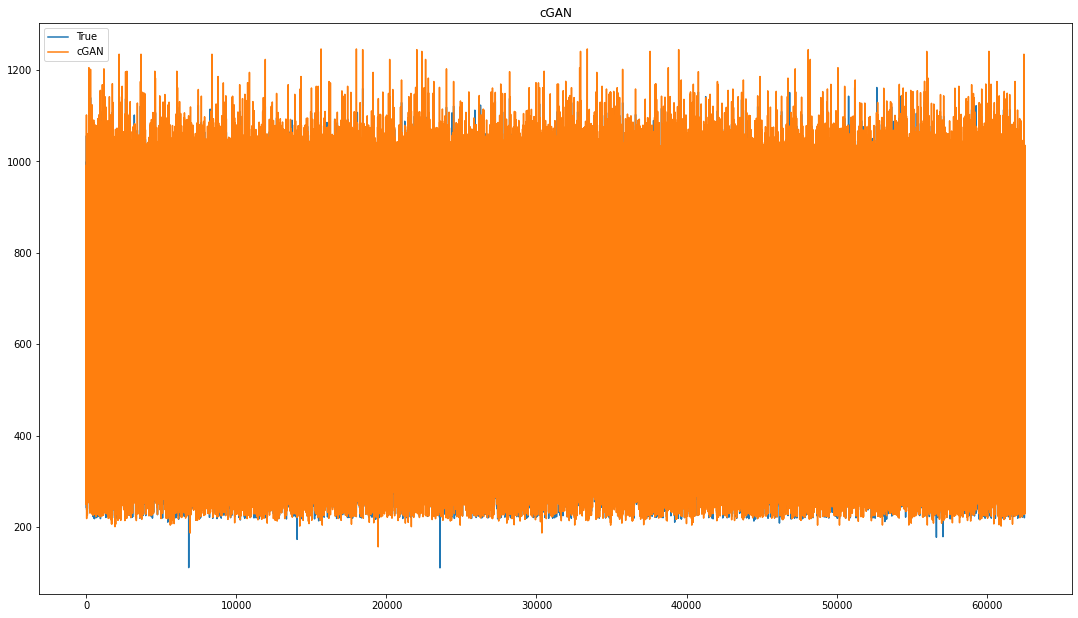

EVS: 0.9878746928114924
R2: 0.9867670345481968
mape: 0.024895187969525986


<Figure size 432x288 with 0 Axes>

In [178]:
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_percentage_error
#plt.plot(ypred_gan_train)
plt.plot(ypred_gan_train_real)
plt.plot(y_train)
plt.legend(['True','cGAN'])
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.title("cGAN")  # 标题
plt.show()
plt.savefig('cGAN_train')

print("EVS:",explained_variance_score(y_train,ypred_gan_train_real))
print("R2:",r2_score(y_train,ypred_gan_train_real))
print("mape:",mean_absolute_percentage_error(y_train,ypred_gan_train_real))

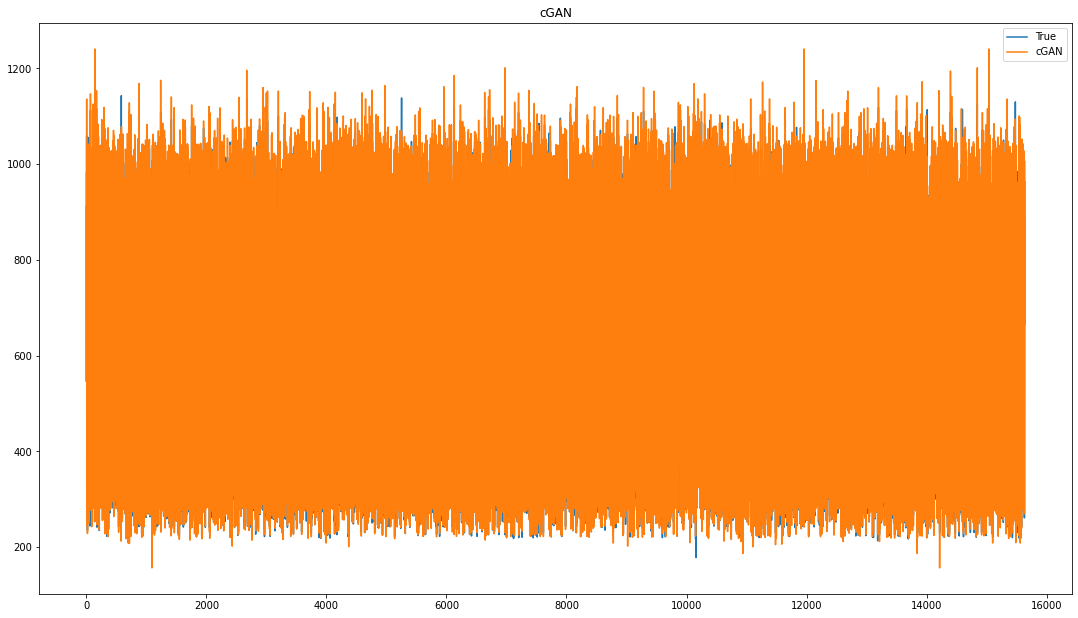

EVS: 0.9881589768343496
R2: 0.9870996503209369
mape: 0.024823273294055464


<Figure size 432x288 with 0 Axes>

In [179]:
plt.plot(ypred_gan_valid_real)
plt.plot(y_val)
plt.legend(['True','cGAN'])
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.title("cGAN")  # 标题
plt.show()
plt.savefig('cGAN_valid.png')

print("EVS:",explained_variance_score(y_val,ypred_gan_valid_real))
print("R2:",r2_score(y_val,ypred_gan_valid_real))
print("mape:",mean_absolute_percentage_error(y_val,ypred_gan_valid_real))

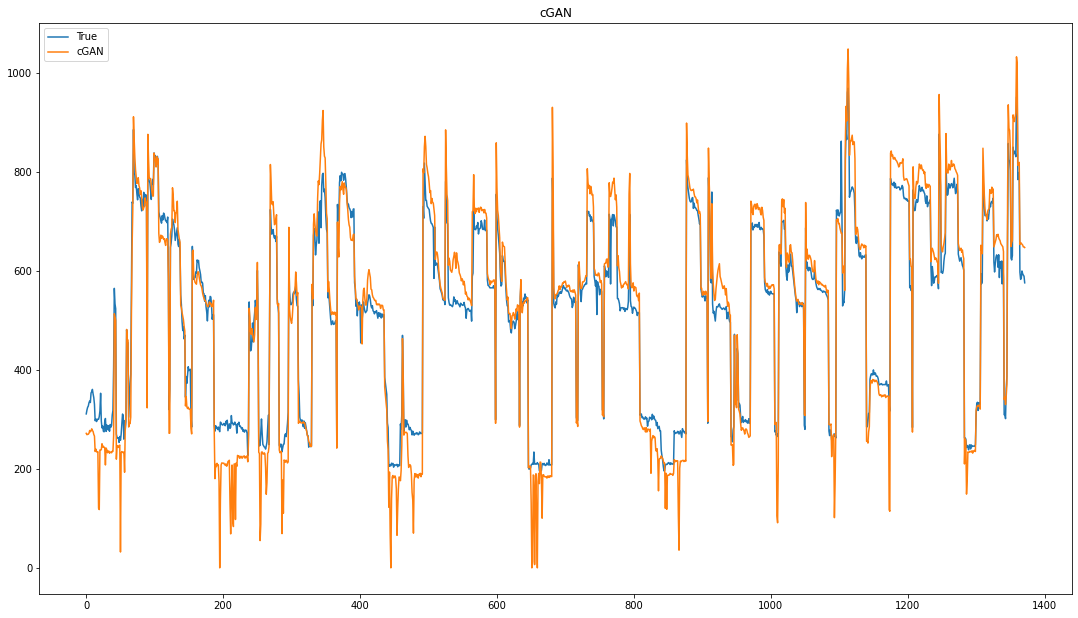

EVS: 0.9432721530930214
R2: 0.9431656189298676
mape: 2963963642638610.5


<Figure size 432x288 with 0 Axes>

In [186]:
plt.plot(ypred_gan_test_real)
plt.plot(y_test)
plt.legend(['True','cGAN'])
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.title("cGAN")  # 标题
plt.show()
plt.savefig('cGAN_test.png')

print("EVS:",explained_variance_score(y_test,ypred_gan_test_real))
print("R2:",r2_score(y_test,ypred_gan_test_real))
print("mape:",mean_absolute_percentage_error(y_test,ypred_gan_test_real))

In [71]:
x_train_scaled

array([[-1.85243553, -1.05296929, -1.52656355, -0.90160628, -1.40548782,
         0.54474806],
       [-0.99707851, -0.89049953,  0.70903657,  1.15526081, -1.40548782,
         0.74825225],
       [-0.23175907,  0.11688781, -1.52656355, -0.90160628,  0.44752854,
        -1.44612596],
       ...,
       [-0.45685302, -0.41937468,  0.51673375, -0.90160628,  0.61059398,
         0.55949528],
       [-0.88453153, -0.84183348,  0.35146706, -0.90160628, -1.40548782,
        -1.44612596],
       [-0.25426847, -0.15938564, -1.52656355, -0.90160628, -1.40548782,
         0.61848414]])

In [69]:
standardscaler_y = StandardScaler()
ypred_gan_train = ypred_gan_train.reshape(-1,1)

ypred_gan_train = scaler_y.inverse_transform(ypred_gan_train)

#ypred_gan_test = ypred_gan_test.reshape(len(ypred_gan_test),)

In [70]:
ypred_gan_train

array([[780.40497],
       [734.5197 ],
       [700.8246 ],
       ...,
       [700.8246 ],
       [700.8246 ],
       [798.3305 ]], dtype=float32)

In [45]:
y_test = test_dataset['NB2_S_x_NYZ_x_x_Fcw_x'].values
y_test

array([271.7519732, 269.0741259, 269.7062556, ..., 648.4493889,
       648.5763148, 647.0702408])

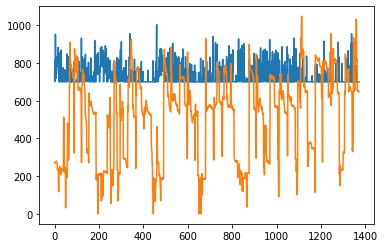

In [48]:
from matplotlib import pyplot as plt
plt.plot(ypred_gan_test)
plt.plot(y_test)


In [54]:
ypred_gan_test= pd.DataFrame(ypred_gan_test)
ypred_gan_test.to_csv('res_cGAN_median.csv')


In [55]:
ypred_gan_test

,0
0,0.215233
1,0.198418
2,0.185546
3,0.189251
4,0.208016
...,...
1367,0.032526
1368,0.028408
1369,0.027684
1370,0.027452


In [42]:

ypred_mean_gan_test, ypred_median_gan_test, ypred_gan_sample_test = cgan.sample(X_test_scaled, 
                                                                                exp_config.training.n_samples)

In [43]:
ypred_median_gan_test

array([[0.21134269],
       [0.20453255],
       [0.18932298],
       ...,
       [0.03362945],
       [0.02874486],
       [0.02560688]], dtype=float32)

In [42]:
ypred_mean_gan_test

array([[304.85995],
       [294.06866],
       [285.99622],
       ...,
       [684.03876],
       [681.7071 ],
       [674.5199 ]], dtype=float32)

In [36]:
ypred_mean_gan_train, ypred_median_gan_train, ypred_gan_sample_train = cgan.sample(X_train_scaled, 
                                                                                   exp_config.training.n_samples)

In [37]:
ypred_mean_gan_train

array([[506.04437],
       [509.3043 ],
       [502.9573 ],
       ...,
       [837.35443],
       [831.73334],
       [832.21405]], dtype=float32)